**EMOTION RECOGNITION FROM TEXT**

Step 1: Import Libraries

Import all necessary Python packages for:

    Data manipulation (NumPy, pandas)

    Visualization (Matplotlib, Seaborn)

    Text cleaning (neattext)

    Machine learning (scikit-learn components)
    
Suppresses warnings to keep output clean

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import neattext.functions as nfx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

Sets consistent visual styling for all plots

Makes visualizations more professional and readable

In [3]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("husl")

Step 2: Load Dataset

Loads the raw emotion dataset

Shows first 5 rows to understand data structure

In [4]:
df = pd.read_csv('emotion_dataset_raw.csv')
display(df.head())

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


Step 3: Text Cleaning

Removes noise from text data:

    Twitter handles (@mentions)

    Stopwords (common words like "the", "and")

    Special characters and extra spaces

Converts to lowercase for consistency

Shows before/after cleaning comparison

In [5]:
def clean_text(text):
    text = nfx.remove_userhandles(text)
    text = nfx.remove_stopwords(text)
    text = nfx.remove_special_characters(text)
    text = nfx.remove_multiple_spaces(text)
    return text.lower().strip()

df['Clean_Text'] = df['Text'].apply(clean_text)
display(df[['Text', 'Clean_Text', 'Emotion']].head())

,Text,Clean_Text,Emotion
0,Why ?,,neutral
1,Sage Act upgrade on my to do list for tommorow.,sage act upgrade list tommorow,joy
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,way homegirl baby funeral man hate funerals sh...,sadness
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant regular featur...,joy
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e ba...,joy


Step 4: Feature Extraction (TF-IDF)

Converts text to numerical features using TF-IDF:

    Weights words by importance in documents

    Limits to top 5000 features to control dimensionality
    
Creates feature matrix (X) and target vector (y)

In [6]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Clean_Text'])
y = df['Emotion']

Step 5: Train-Test Split

Splits data into training (80%) and testing (20%) sets

random_state ensures reproducible results

Allows proper model evaluation on unseen data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 6: Model Training

Initializes Logistic Regression classifier

max_iter=1000 ensures convergence

Trains model on training data

In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Step 7: Model Evaluation

Tests model on held-out test data

Calculates accuracy and detailed classification metrics

Shows precision, recall, f1-score per emotion class

In [9]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Model Accuracy: {accuracy * 100:.2f}%")
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Model Accuracy: 60.43%

 Classification Report:
              precision    recall  f1-score   support

       anger       0.65      0.54      0.59       836
     disgust       0.73      0.09      0.17       202
        fear       0.75      0.63      0.68      1104
         joy       0.56      0.82      0.67      2214
     neutral       0.65      0.31      0.42       481
     sadness       0.58      0.59      0.59      1327
       shame       0.77      0.43      0.56        23
    surprise       0.57      0.38      0.45       772

    accuracy                           0.60      6959
   macro avg       0.66      0.47      0.52      6959
weighted avg       0.62      0.60      0.59      6959



Step 8: Visualizations


 Visualizing Emotion Distribution...


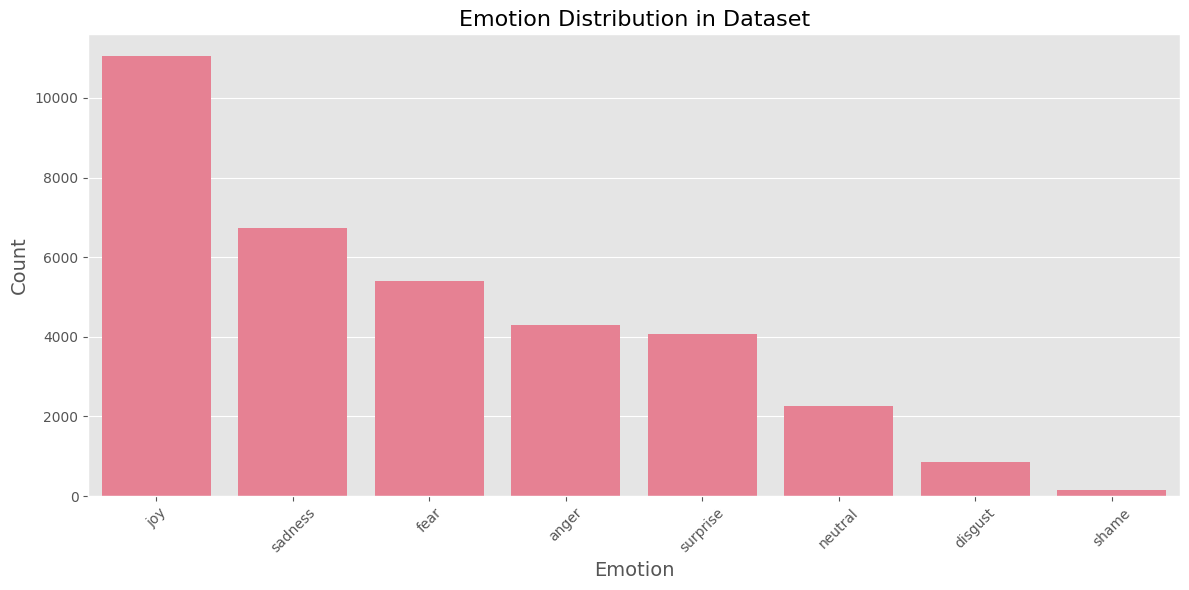

In [10]:
def plot_emotion_distribution():
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=y, order=y.value_counts().index)
    plt.title('Emotion Distribution in Dataset', fontsize=16)
    plt.xlabel('Emotion', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

print("\n Visualizing Emotion Distribution...")
plot_emotion_distribution()


📈 Plotting Confusion Matrix...


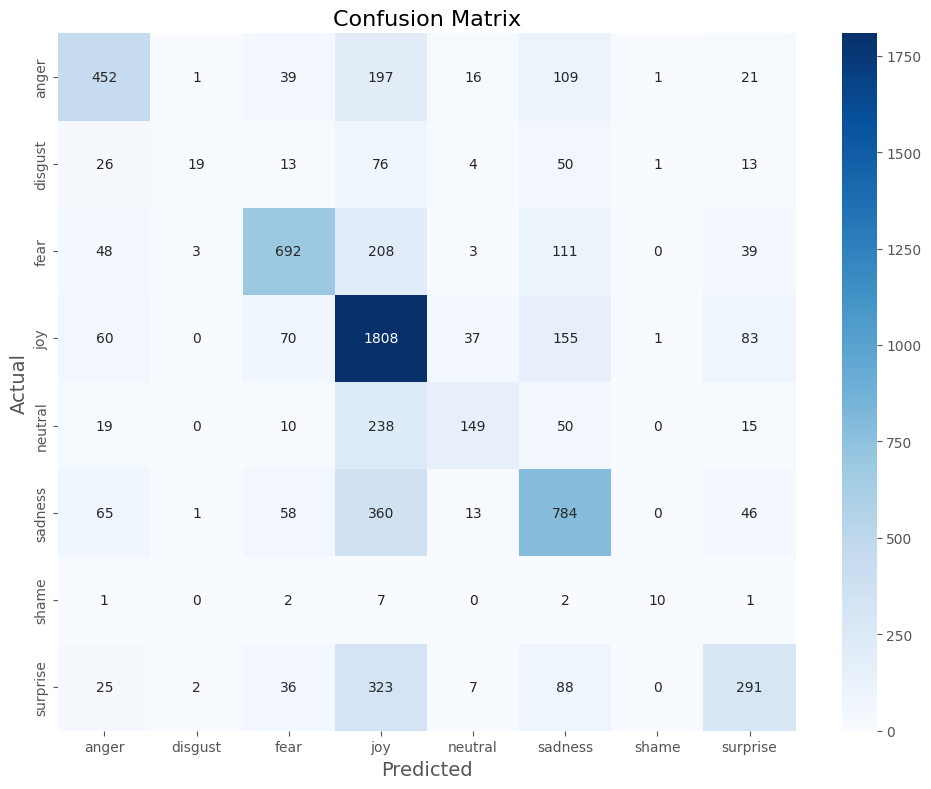

In [11]:
# Confusion Matrix
def plot_confusion_matrix():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.tight_layout()
    plt.show()

print("\n📈 Plotting Confusion Matrix...")
plot_confusion_matrix()

Step 9: Prediction Function

Takes raw text input

Applies same cleaning as training data

Returns both predicted emotion and probabilities for all classes

Includes visualization of probabilities

In [12]:
def predict_with_probabilities(text):
    # Clean input text
    cleaned_text = clean_text(text)
    print(f"\n🧹 Cleaned Text: {cleaned_text}")
    
    # Vectorize
    text_vector = vectorizer.transform([cleaned_text])
    
    # Predict
    prediction = model.predict(text_vector)[0]
    probabilities = model.predict_proba(text_vector)[0]
    
    # Create probability dataframe
    prob_df = pd.DataFrame({
        'Emotion': model.classes_,
        'Probability': probabilities
    }).sort_values('Probability', ascending=False)
    
    # Plot probabilities
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x='Emotion', y='Probability', data=prob_df)
    plt.title('Emotion Prediction Probabilities', fontsize=16)
    plt.xlabel('Emotion', fontsize=14)
    plt.ylabel('Probability', fontsize=14)
    
    # Add value labels
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", 
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=11, color='black',
                   xytext=(0, 5), textcoords='offset points')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return prediction, prob_df

Step 10: User Interaction

Provides interactive interface

Shows cleaned text, prediction, and probability distribution

Visualizes confidence in prediction

🎤 Emotion Detection System - Enter Text to Analyze

🧹 Cleaned Text: leave


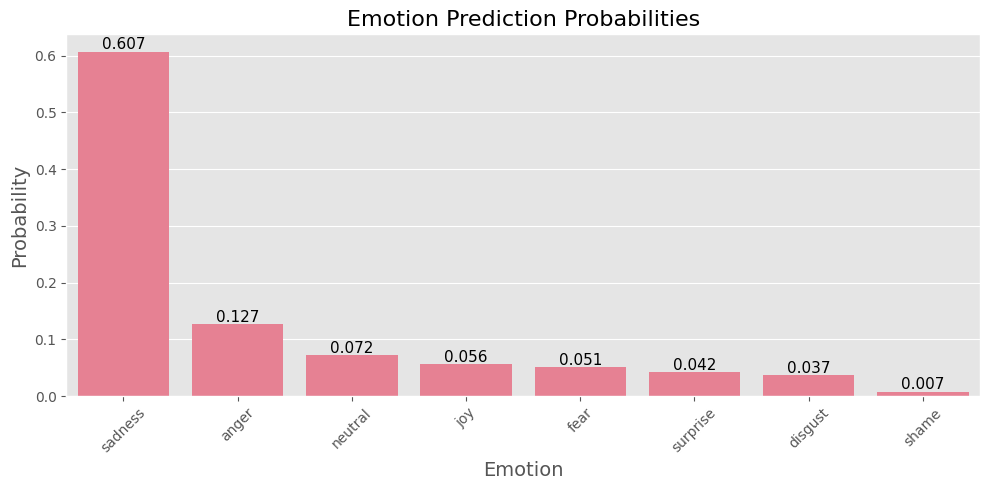


Original Text: leave me alone

🎭 Predicted Emotion: sadness

📊 Prediction Probabilities:


,Emotion,Probability
5,sadness,0.607120
0,anger,0.127195
4,neutral,0.072144
3,joy,0.055980
2,fear,0.051277
7,surprise,0.042048
1,disgust,0.036790
6,shame,0.007446


In [13]:
print("🎤 Emotion Detection System - Enter Text to Analyze")
user_input = input("\nEnter a sentence to analyze its emotion: ")

if user_input.strip():
    predicted_emotion, probabilities = predict_with_probabilities(user_input)
    print(f"\nOriginal Text: {user_input}")
    print(f"\n🎭 Predicted Emotion: {predicted_emotion}")
    print("\n📊 Prediction Probabilities:")
    display(probabilities.style.background_gradient(cmap='Blues'))
else:
    print("No input provided. Exiting...")